In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os

In the next cell, we are going to initialize a dataframe with general information from all players. We selected the key_stats.csv because it contains the information of all players, no matter the position.

In [2]:
files_base_dir = '/kaggle/input/ucl-202122-uefa-champions-league'
all_players_file = 'key_stats'

players_df = pd.read_csv(f"{files_base_dir}/{all_players_file}.csv").set_index(['player_name', 'club', 'position']).stack().unstack()

In [3]:
players_df.head()

,,,minutes_played,match_played,goals,assists,distance_covered
player_name,club,position,,,,,
Aaronson,Salzburg,Midfielder,715,8,0,2,103.5
Abubakari,Malmö,Forward,116,4,0,0,15.3
Acuña,Sevilla,Defender,379,5,0,0,43.2
Adams,Leipzig,Midfielder,292,5,0,0,38.9
Adamu,Salzburg,Forward,231,8,1,0,32.6


In [4]:
players_df.columns

Index(['minutes_played', 'match_played', 'goals', 'assists',
       'distance_covered'],
      dtype='object')

Now, we are going to unite all of the information in the csv files into one single dataframe. For that, we are going to concatenate each of the csvs based on a ['player_name', 'club', 'position'] index.

In [5]:
files = ['attacking', 'defending', 'goalkeeping', 'attempts', 'disciplinary', 'distributon', 'goals']

for file in files:
    players_extracted = pd.read_csv(f"{files_base_dir}/{file}.csv")
    players_extracted = players_extracted.set_index(['player_name', 'club', 'position']).stack().unstack()
    
    players_extracted.drop('serial', axis=1, inplace=True, errors='ignore')
    for col in list(players_df.columns):
        players_extracted.drop(col, axis=1, inplace=True, errors='ignore')
    
    players_df = pd.concat([
        players_df,
        players_extracted
    ], axis=1)
    
players_df.reset_index(inplace=True)
players_df.fillna(0.0, inplace=True)

In [6]:
players_df.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,corner_taken,offsides,...,cross_attempted,cross_complted,freekicks_taken,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties
0,Aaronson,Salzburg,Midfielder,715.0,8.0,0.0,2.0,103.5,4.0,5.0,...,18.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abubakari,Malmö,Forward,116.0,4.0,0.0,0.0,15.3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Acuña,Sevilla,Defender,379.0,5.0,0.0,0.0,43.2,0.0,0.0,...,30.0,12.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Adams,Leipzig,Midfielder,292.0,5.0,0.0,0.0,38.9,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Adamu,Salzburg,Forward,231.0,8.0,1.0,0.0,32.6,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
players_df.columns

Index(['player_name', 'club', 'position', 'minutes_played', 'match_played',
       'goals', 'assists', 'distance_covered', 'corner_taken', 'offsides',
       'dribbles', 'balls_recoverd', 'tackles', 't_won', 't_lost',
       'clearance_attempted', 'saved', 'conceded', 'saved_penalties',
       'cleansheets', 'punches made', 'total_attempts', 'on_target',
       'off_target', 'blocked', 'fouls_committed', 'fouls_suffered', 'red',
       'yellow', 'pass_accuracy', 'pass_attempted', 'pass_completed',
       'cross_accuracy', 'cross_attempted', 'cross_complted',
       'freekicks_taken', 'right_foot', 'left_foot', 'headers', 'others',
       'inside_area', 'outside_areas', 'penalties'],
      dtype='object')

In [8]:
players_df.describe()

,minutes_played,match_played,goals,assists,corner_taken,offsides,dribbles,balls_recoverd,tackles,t_won,...,cross_attempted,cross_complted,freekicks_taken,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,...,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,329.845539,5.062583,0.490013,0.374168,0.782956,0.332889,2.105193,13.697736,3.950732,1.727031,...,5.145140,1.380826,4.430093,0.237017,0.169108,0.079893,0.005326,0.442077,0.050599,0.047936
std,248.883454,2.739357,1.310305,0.843689,3.341780,1.240848,6.611776,14.799026,4.905667,2.503076,...,8.819159,2.844664,6.567808,0.806483,0.636159,0.333079,0.072835,1.227045,0.268520,0.283489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,490.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.500000,6.000000,2.000000,...,7.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1230.000000,13.000000,15.000000,7.000000,36.000000,10.000000,83.000000,76.000000,35.000000,18.000000,...,81.000000,24.000000,53.000000,11.000000,8.000000,3.000000,1.000000,13.000000,3.000000,3.000000


Now, we are going to scatterplot the goals/shots by position

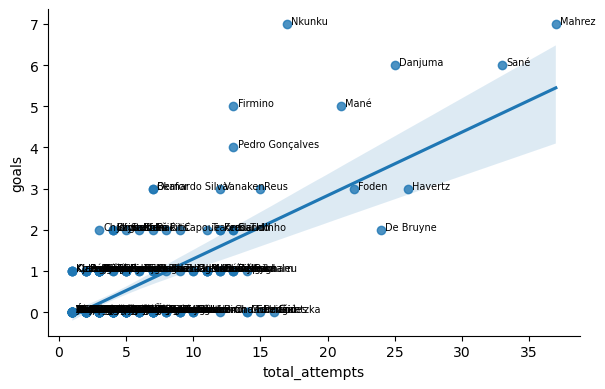

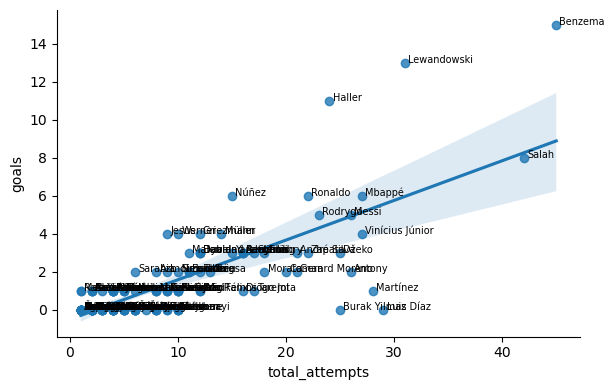

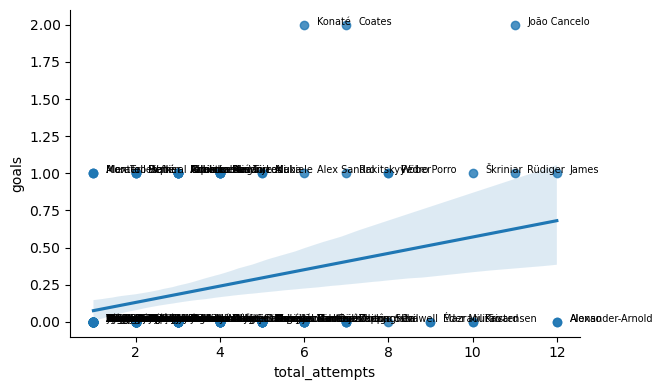

In [9]:
def plot_goals_shots_chart(data, x, y, hue=None, height=4, text_spacing=0.3):
    fgrid = sns.lmplot(data=data, x=x, y=y, hue=hue, height=height, aspect=1.5)
    ax = fgrid.axes[0,0]

    for i, row in data.iterrows():
        ax.text(row[x] + text_spacing, row[y], row['player_name'], fontsize=7)
    

positions = players_df['position'].unique()
for position in positions:
    goals_shots_data = players_df[(players_df['position'] == position) & (players_df['total_attempts'] > 0)]
    if not len(goals_shots_data): continue
    plot_goals_shots_chart(goals_shots_data, 'total_attempts', 'goals')


Or we can just plot all of it in a sigle chart

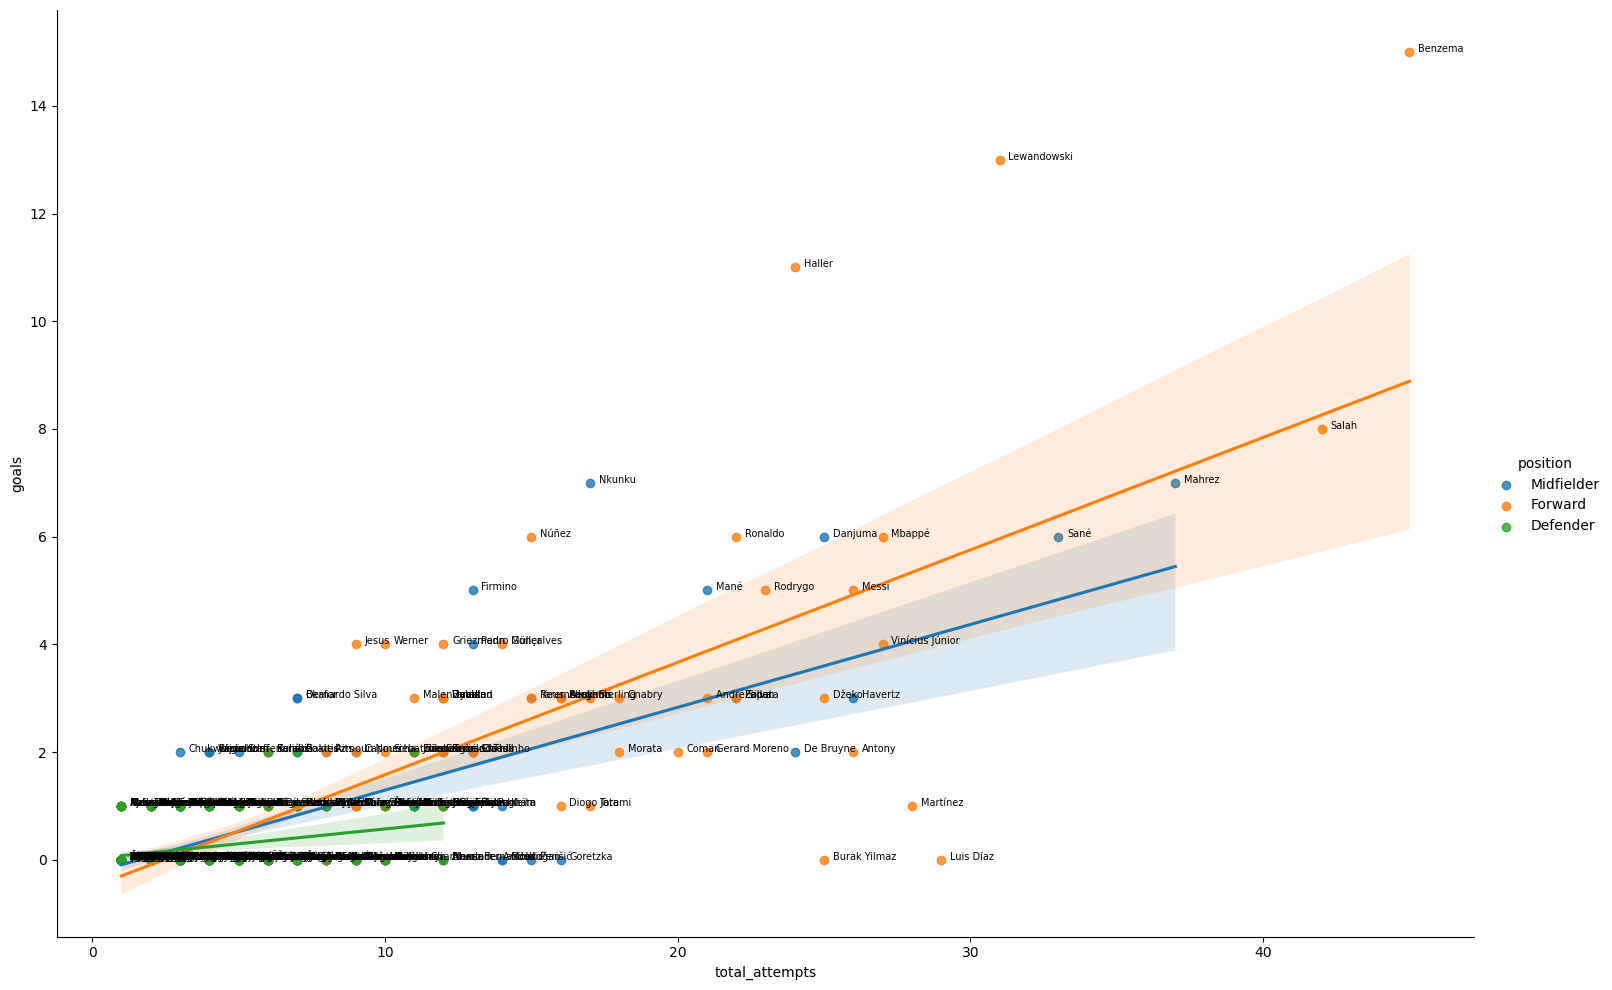

In [10]:
goals_shots_data = players_df[players_df['total_attempts'] > 0]
plot_goals_shots_chart(goals_shots_data, 'total_attempts', 'goals', hue='position', height=10)

By looking at these charts, we can see that, of course, the players upfront tend to get goals with fewer attempts than those that play on a more defensive role. A few players that are worth highlighting are Benzema, Lewandowski and Haller, whose goals tally were way above the projected line for fowards. Another one worth mentioning is Nkunku that, despite not having that many shots, managed to get 7 goals. He was way above the projected line for any position.

A couple of famous lowlights were Martinez and Luis Diaz. If you saw the 2022 World Cup, Martinez' being under the projected line was not a surprise, even though this numbers were in the Champions League that preceded the World Cup.

Let's take a look at the midfielders/fowards goals when we compare them with their offsides.

In [11]:
forwards_df = players_df[(players_df['goals'] > 0) & (players_df['position'] == 'Forward')]
forwards_df.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,corner_taken,offsides,...,cross_attempted,cross_complted,freekicks_taken,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties
4,Adamu,Salzburg,Forward,231.0,8.0,1.0,0.0,32.6,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Adeyemi,Salzburg,Forward,607.0,8.0,3.0,1.0,69.2,0.0,0.0,...,7.0,2.0,1.0,0.0,3.0,0.0,0.0,3.0,0.0,2.0
17,Alcácer,Villarreal,Forward,73.0,3.0,1.0,0.0,10,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
22,Alexis Sánchez,Inter,Forward,155.0,6.0,1.0,1.0,19,0.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
28,André Silva,Leipzig,Forward,410.0,6.0,3.0,2.0,47.2,0.0,9.0,...,3.0,2.0,1.0,2.0,0.0,1.0,0.0,3.0,0.0,0.0


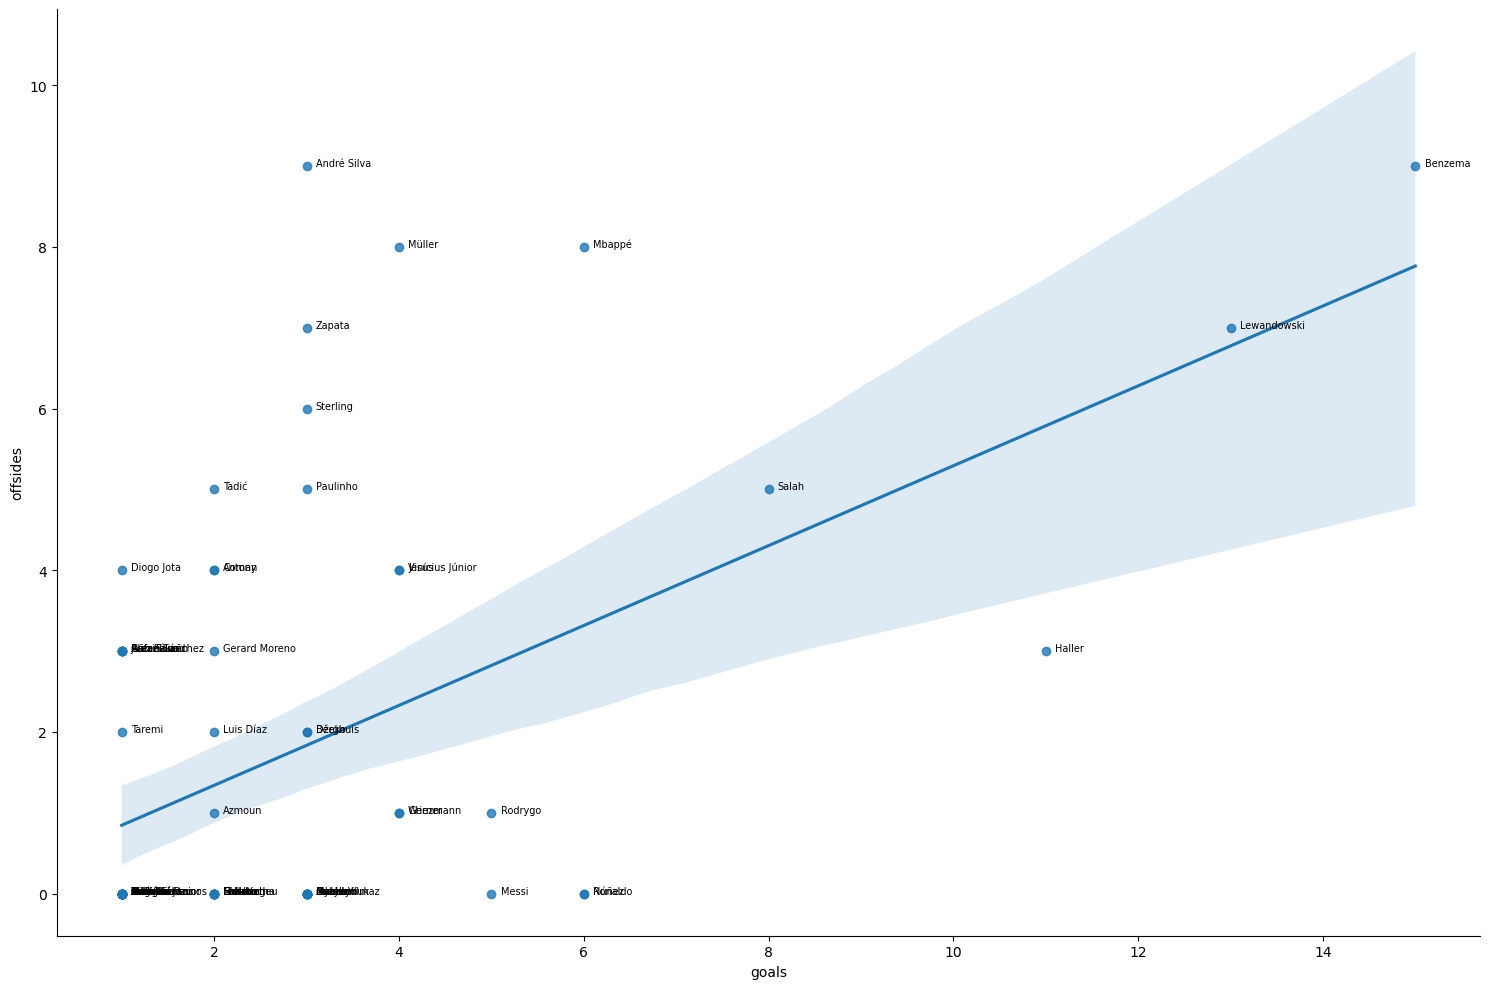

In [12]:
plot_goals_shots_chart(forwards_df, 'goals', 'offsides', height=10, text_spacing=0.1)

When we look at this chart, a couple of things stood out for me.

1. Mbappé, which is one of the best players in the world, is way above the projected line. That means that he gets offside way more than he should, based on his goals contribution.
2. Haller, the third best scorer in the competition, has only 3 offsides. That shows that he converts his opportunities and shows awareness of his position, something that an elite striker must have.